# Logistic Regression

We use a classification model to predict which customers will default on their credit card debt. 

## Data

To learn more about the data and all of the data preparation steps, take a look at [this page](/docs/data-credit.ipynb). Here, we simply import the prepared data:

### Import data

In [159]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/kirenz/classification/main/_static/data/default-prepared.csv')

In [160]:
# define outcome variable as y_label
y_label = 'default_Yes'

# select features
features = df.drop(columns=[y_label]).columns.to_numpy()

# create feature data
X = df[features]

# create response
y = df[y_label]

### Data split

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

## Model

### Select model

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
clf = LogisticRegression()

### Training & validation

In [164]:
from sklearn.model_selection import cross_val_score

# cross-validation with 5 folds
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [165]:
# store cross-validation scores
df_scores = pd.DataFrame({"logistic": scores})

# reset index to match the number of folds
df_scores.index += 1

# print dataframe
df_scores.style.background_gradient(cmap='Blues')

In [166]:
import altair as alt

alt.Chart(df_scores.reset_index()).mark_line(
     point=alt.OverlayMarkDef()
).encode(
    x=alt.X("index", bin=False, title="Fold", axis=alt.Axis(tickCount=5)),
    y=alt.Y("logistic", aggregate="mean", title="F1")
)

alt.Chart(...)

In [167]:
df_scores.describe().T

count      mean       std       min    25%    50%       75%  \
logistic    5.0  0.965143  0.001059  0.963571  0.965  0.965  0.965714   

               max  
logistic  0.966429

### Fit model

In [168]:
# Fit the model to the complete training data
clf.fit(X_train, y_train)

LogisticRegression()

### Coefficients

In [169]:
# intercept
intercept = pd.DataFrame({
    "Name": "Intercept",
    "Coefficient":clf.intercept_}
    )
intercept


Name  Coefficient
0  Intercept    -2.995871

In [176]:
# make a slope table

coefs = pd.DataFrame(clf.coef_).T
coefs.rename(columns={0: "Coef"}, inplace=True)

features = pd.DataFrame(features)
features.rename(columns={0: "Name"}, inplace=True)

# combine estimates of intercept and slopes
table = pd.concat([coefs, features], axis=1)

round(table, 3)

Coef         Name
0  0.004      balance
1 -0.000       income
2 -3.961  student_Yes

### Evaluation on test set

In [178]:
y_pred = clf.predict(X_test)

In [177]:
# Return the mean accuracy on the given test data and labels:
clf.score(X_test, y_test)

0.968

### Confusion matrix

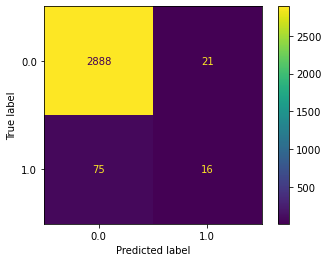

In [179]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test);

### Classification report

In [180]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2909
           1       0.43      0.18      0.25        91

    accuracy                           0.97      3000
   macro avg       0.70      0.58      0.62      3000
weighted avg       0.96      0.97      0.96      3000



### ROC Curve

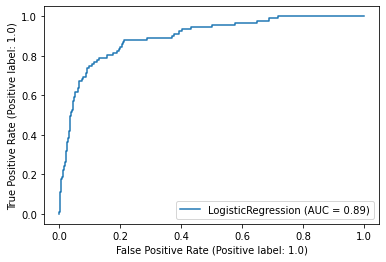

In [181]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test);

### AUC Score

In [182]:
from sklearn.metrics import roc_auc_score

In [183]:
roc_auc_score(y_test, clf.decision_function(X_test))

0.8946921074800072

Option 2 to obtain AUC:

In [184]:
y_score = clf.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_score)

0.8946921074800072

### Change threshold

Use specific threshold

In [186]:
# obtain probabilities
pred_proba = clf.predict_proba(X_test)

In [187]:
# set threshold to 0.25

df_25 = pd.DataFrame({'y_pred': pred_proba[:,1] > .25})

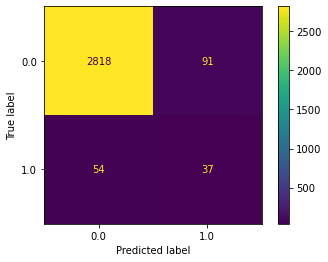

In [188]:
ConfusionMatrixDisplay.from_predictions(y_test, df_25['y_pred']);

### Classification report

In [189]:
print(classification_report(y_test, df_25['y_pred'], target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2909
           1       0.29      0.41      0.34        91

    accuracy                           0.95      3000
   macro avg       0.64      0.69      0.66      3000
weighted avg       0.96      0.95      0.96      3000

